### **Extracting Files**

In [137]:

import os
import zipfile
import pandas as pd

zip_filename = "archive (2).zip"
extract_dir = "weather_data"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted!")

file_path = os.path.join(extract_dir, "philippines_typhoon_monthly_2014_2024.csv")
data = pd.read_csv(file_path)




Files extracted!


### **Loading the Dataset**

In [138]:
print("📊 RAW DATA OVERVIEW")
display(data.head())

📊 RAW DATA OVERVIEW


,Month,Number_of_Typhoons,ONI,Nino3.4_SST_anomaly,Western_Pacific_SST,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Prev_month_typhoons,Vertical_Wind_Shear
0,1,1,0.03,-0.05,0.36,54.8,1009.8,0,0,13.2
1,2,0,0.20,0.18,-0.43,59.5,1009.5,7,1,13.8
2,3,0,0.02,0.00,0.01,49.3,1009.4,6,0,13.0
3,4,0,0.13,0.07,-0.15,57.8,1008.2,0,0,10.7
4,5,0,-0.03,-0.05,-0.41,61.4,1008.1,3,0,11.1


### **Cleaning the Data, Keeping only the Independent and Dependent Variables**

In [139]:

columns_to_keep = [
    'Nino3.4_SST_anomaly',
    'Western_Pacific_SST',
    'Midlevel_Humidity',
    'SeaLevelPressure',
    'MJO_Phase',
    'Month',
    'Vertical_Wind_Shear'
]

cleaned_data = data[columns_to_keep].copy()

cleaned_data.head()

,Nino3.4_SST_anomaly,Western_Pacific_SST,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Month,Vertical_Wind_Shear
0,-0.05,0.36,54.8,1009.8,0,1,13.2
1,0.18,-0.43,59.5,1009.5,7,2,13.8
2,0.00,0.01,49.3,1009.4,6,3,13.0
3,0.07,-0.15,57.8,1008.2,0,4,10.7
4,-0.05,-0.41,61.4,1008.1,3,5,11.1


### **Checking for Missing Values**

In [140]:

cleaned_data.isnull().sum()


Nino3.4_SST_anomaly    0
Western_Pacific_SST    0
Midlevel_Humidity      0
SeaLevelPressure       0
MJO_Phase              0
Month                  0
Vertical_Wind_Shear    0
dtype: int64

### **Removing Duplicates**

In [141]:

cleaned_data = cleaned_data.drop_duplicates()

### **Displaying Cleaned Data**

In [142]:

cleaned_data.head()


,Nino3.4_SST_anomaly,Western_Pacific_SST,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Month,Vertical_Wind_Shear
0,-0.05,0.36,54.8,1009.8,0,1,13.2
1,0.18,-0.43,59.5,1009.5,7,2,13.8
2,0.00,0.01,49.3,1009.4,6,3,13.0
3,0.07,-0.15,57.8,1008.2,0,4,10.7
4,-0.05,-0.41,61.4,1008.1,3,5,11.1


### **Getting the Inputs and Outputs**

### Independent Variables

In [143]:
X = cleaned_data[[
    'Nino3.4_SST_anomaly',
    'Western_Pacific_SST',
    'Midlevel_Humidity',
    'SeaLevelPressure',
    'MJO_Phase',
    'Month'
]]

X.head()

,Nino3.4_SST_anomaly,Western_Pacific_SST,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Month
0,-0.05,0.36,54.8,1009.8,0,1
1,0.18,-0.43,59.5,1009.5,7,2
2,0.00,0.01,49.3,1009.4,6,3
3,0.07,-0.15,57.8,1008.2,0,4
4,-0.05,-0.41,61.4,1008.1,3,5


### Dependent Variables

In [144]:
y = cleaned_data['Vertical_Wind_Shear']

y.head()

0    13.2
1    13.8
2    13.0
3    10.7
4    11.1
Name: Vertical_Wind_Shear, dtype: float64

### **Creating the Training Set and the Test Set**

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=0)

In [146]:
X_train

,Nino3.4_SST_anomaly,Western_Pacific_SST,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Month
63,0.52,0.57,64.7,1007.7,0,4
71,0.59,-0.10,54.8,1009.5,0,12
86,-0.94,-0.28,58.2,1009.4,4,3
33,-0.63,-0.26,64.6,1004.5,0,10
129,0.94,0.31,59.2,1005.7,6,10
...,...,...,...,...,...,...
9,0.07,-0.32,60.7,1004.6,8,10
103,-1.27,0.13,67.6,1004.5,5,8
67,0.70,-0.29,73.8,1004.6,3,8
117,0.20,-0.11,60.9,1005.1,3,10


In [147]:
X_test

,Nino3.4_SST_anomaly,Western_Pacific_SST,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Month
93,-0.96,0.63,65.2,1006.2,1,10
66,0.73,-0.11,68.5,1006.1,8,7
26,-0.46,-0.41,51.0,1008.4,0,3
8,-0.05,0.33,73.1,1004.7,3,9
30,-0.49,-0.44,72.1,1004.9,3,7
91,-0.90,0.13,69.8,1005.5,4,8
109,-0.03,0.32,62.0,1008.3,6,2
100,-1.19,-0.50,63.2,1007.7,5,5
44,-0.14,-0.02,67.6,1003.4,7,9
101,-1.47,-0.03,75.7,1004.5,6,6


In [148]:
y_train

63     10.9
71     11.6
86     12.8
33      9.0
129     9.1
       ... 
9       9.4
103     8.1
67      7.9
117     9.3
47     12.3
Name: Vertical_Wind_Shear, Length: 105, dtype: float64

In [149]:
y_test

93      9.0
66      8.6
26     13.0
8       6.9
30      8.2
91      8.8
109    12.7
100    10.8
44      8.1
101     8.5
99     10.4
56      8.5
43      8.3
96     12.3
22      9.5
78      8.0
95     12.4
97     12.3
7       8.0
24     12.3
61     13.7
10     10.4
108    13.1
45      8.6
16     11.4
2      13.0
68      8.5
Name: Vertical_Wind_Shear, dtype: float64

### **Scaling**

In [150]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Building the Training Model**

### **Building the Model**

In [151]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


### **Training the Model**

In [152]:
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### **Inference**

In [153]:
y_pred = model.predict(X_test_scaled)


One data point, including Month, Nino3.4_SST_anomaly,  Western Pacific SST, Midlevel_Humidity, SeaLevelPressure and MJO phase is used for making the prediction of the Vertical Wind Shear.


In [154]:


sample = pd.DataFrame([[-0.05, 0.36, 54.8, 1009.8, 0, 1]],
                      columns=X.columns)

sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
prediction




array([12.4704023])

In [155]:
# Pang test, para madaling makita ang data
print("📊 RAW DATA OVERVIEW")
display(cleaned_data.head())

📊 RAW DATA OVERVIEW


,Nino3.4_SST_anomaly,Western_Pacific_SST,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Month,Vertical_Wind_Shear
0,-0.05,0.36,54.8,1009.8,0,1,13.2
1,0.18,-0.43,59.5,1009.5,7,2,13.8
2,0.00,0.01,49.3,1009.4,6,3,13.0
3,0.07,-0.15,57.8,1008.2,0,4,10.7
4,-0.05,-0.41,61.4,1008.1,3,5,11.1


## **Evaluating the Model**

### **Mean Absolute Error**

In [156]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.49331109432446607


### **Mean Squared Error**

In [157]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.4333668469061375


### **R-Squared**

In [158]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8962774285769621

### **Adjusted R-Squared**

In [159]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.8651606571500507

### **Visualizations**

### ScatterPlot

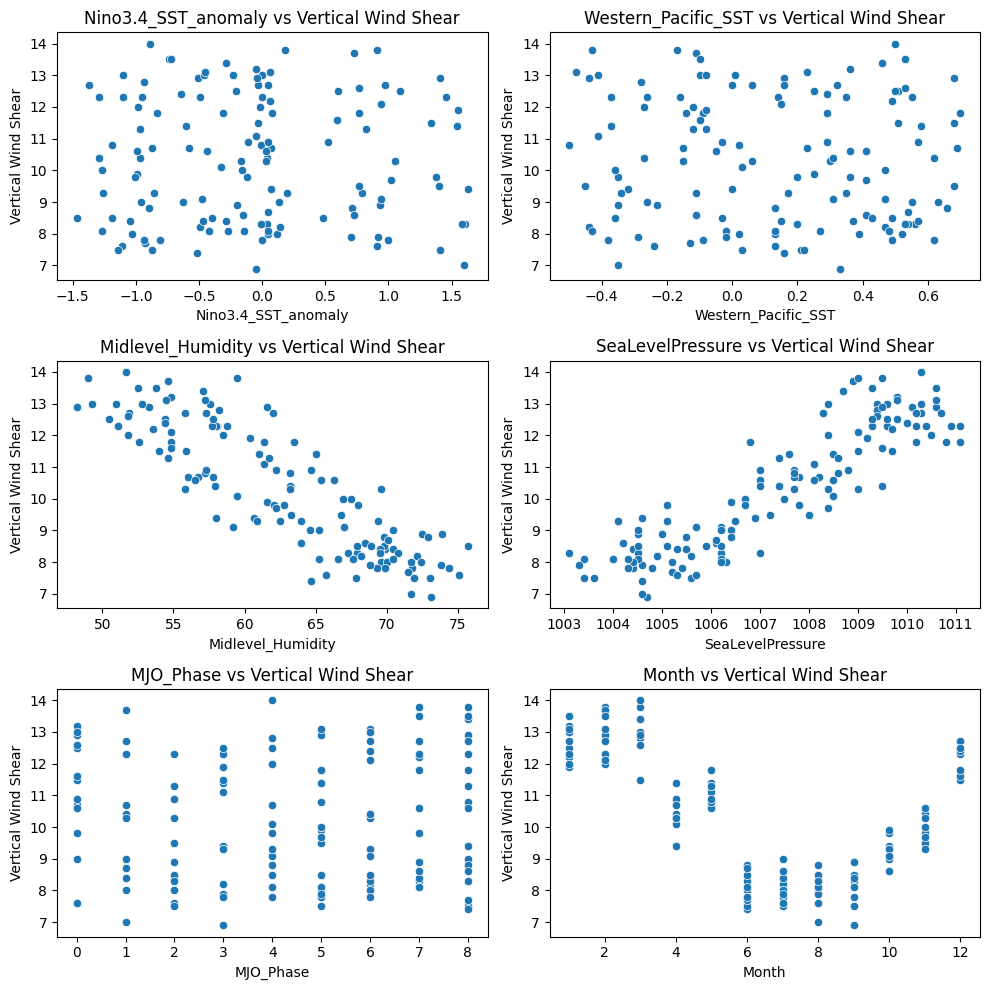

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of independent variables
features = [
    'Nino3.4_SST_anomaly',
    'Western_Pacific_SST',
    'Midlevel_Humidity',
    'SeaLevelPressure',
    'MJO_Phase',
    'Month'
]

plt.figure(figsize=(10, 10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=data, x=col, y='Vertical_Wind_Shear')
    plt.title(f"{col} vs Vertical Wind Shear")
    plt.xlabel(col)
    plt.ylabel("Vertical Wind Shear")

plt.tight_layout()
plt.show()


### Heatmap

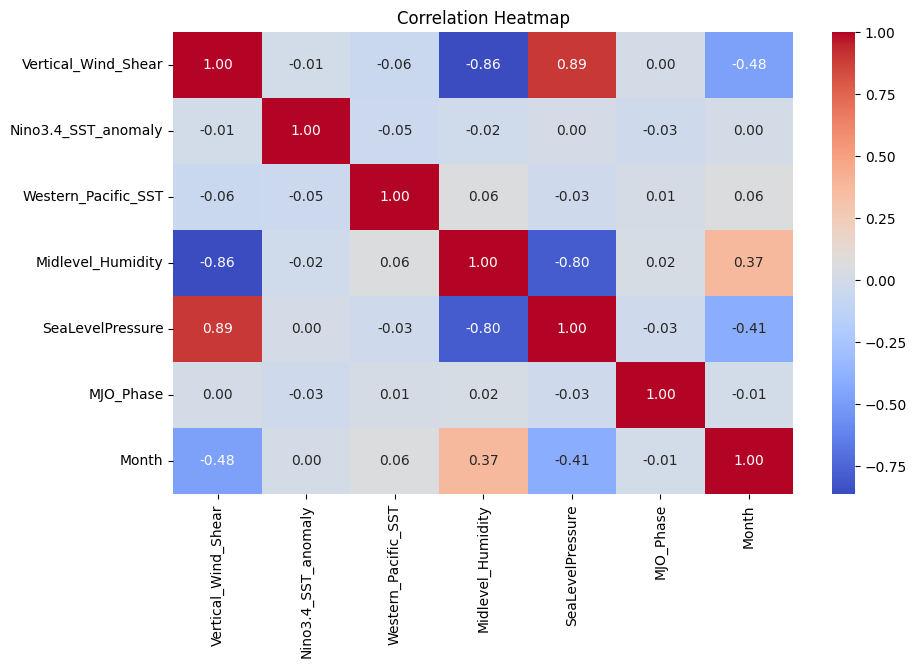

In [161]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Vertical_Wind_Shear'] + features].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


1. **Model Performance** 

The model shows acceptable performance based on the R² and Adjusted R² values. This indicates that the selected climate variables explain a meaningful portion of the variation in Vertical Wind Shear. While not perfect, the model captures the main patterns in the data.

2. **Error Analysis**

The MAE, MSE, and RMSE values show that the average difference between predicted and actual wind shear values is reasonably small. This means the model can produce predictions that stay close to the real observations, with no major errors across the test data.

3. **Trends Observed**

The scatter plots and heatmap reveal strong relationships between Vertical Wind Shear and several climate factors, especially Sea‑Level Pressure and Midlevel Humidity. Predicted values follow stable patterns, suggesting no extreme jumps or drops in wind shear for the evaluated months. Seasonal effects (Month) also contribute moderately to the observed patterns.